# Finite difference equations & maps

In [72]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

def map_simulate(x0, f_rules, steps=10, print_results=True):
    """ simulates map. """
    states = np.zeros(shape=((steps+1), x0.size), dtype=float)
    
    
    pprint("x0 = {}".format(x0.astype(np.float)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    # convert to pandas data frame
    names = [f"S{k}" for k in range(x0.size)]
    index = [f"x{k}" for k in range(steps+1)]
    df = pd.DataFrame(states, columns=names, index=index)
    # add time column
    df["time"] = range(steps+1)
    
    if print_results:
        print(df)
        print("-" * 40)
    return df

def f_linear_factory(R=1.0):
    print(f"Creating f_linear: 'x(t+1) = {R} * x'")
    
    def f_linear(x, R=R):
        """ Linear map. """
        x_new = R * x
        return x_new
    
    return f_linear


In [73]:
df1 = map_simulate(x0 = np.array([1.0]), f_rules=f_linear_factory(R=1.0))
df2 = map_simulate(x0 = np.array([1.0]), f_rules=f_linear_factory(R=0.8))

# this works also for maps with multiple state variables
df2 = map_simulate(x0 = np.array([1.0, 2.0, 3.0]), f_rules=f_linear_factory(R=1.5))

Creating f_linear: 'x(t+1) = 1.0 * x'
'x0 = [1.]'
      S0  time
x0   1.0     0
x1   1.0     1
x2   1.0     2
x3   1.0     3
x4   1.0     4
x5   1.0     5
x6   1.0     6
x7   1.0     7
x8   1.0     8
x9   1.0     9
x10  1.0    10
----------------------------------------
Creating f_linear: 'x(t+1) = 0.8 * x'
'x0 = [1.]'
           S0  time
x0   1.000000     0
x1   0.800000     1
x2   0.640000     2
x3   0.512000     3
x4   0.409600     4
x5   0.327680     5
x6   0.262144     6
x7   0.209715     7
x8   0.167772     8
x9   0.134218     9
x10  0.107374    10
----------------------------------------
Creating f_linear: 'x(t+1) = 1.5 * x'
'x0 = [1. 2. 3.]'
            S0          S1          S2  time
x0    1.000000    2.000000    3.000000     0
x1    1.500000    3.000000    4.500000     1
x2    2.250000    4.500000    6.750000     2
x3    3.375000    6.750000   10.125000     3
x4    5.062500   10.125000   15.187500     4
x5    7.593750   15.187500   22.781250     5
x6   11.390625   22.781250 

Creating f_linear: 'x(t+1) = -2.0 * x'
'x0 = [1.]'
         S0  time
x0      1.0     0
x1     -2.0     1
x2      4.0     2
x3     -8.0     3
x4     16.0     4
x5    -32.0     5
x6     64.0     6
x7   -128.0     7
x8    256.0     8
x9   -512.0     9
x10  1024.0    10
----------------------------------------
Creating f_linear: 'x(t+1) = -1.0 * x'
'x0 = [1.]'
      S0  time
x0   1.0     0
x1  -1.0     1
x2   1.0     2
x3  -1.0     3
x4   1.0     4
x5  -1.0     5
x6   1.0     6
x7  -1.0     7
x8   1.0     8
x9  -1.0     9
x10  1.0    10
----------------------------------------
Creating f_linear: 'x(t+1) = -0.5 * x'
'x0 = [1.]'
           S0  time
x0   1.000000     0
x1  -0.500000     1
x2   0.250000     2
x3  -0.125000     3
x4   0.062500     4
x5  -0.031250     5
x6   0.015625     6
x7  -0.007812     7
x8   0.003906     8
x9  -0.001953     9
x10  0.000977    10
----------------------------------------
Creating f_linear: 'x(t+1) = 0.0 * x'
'x0 = [1.]'
      S0  time
x0   1.0     0
x1   0.0

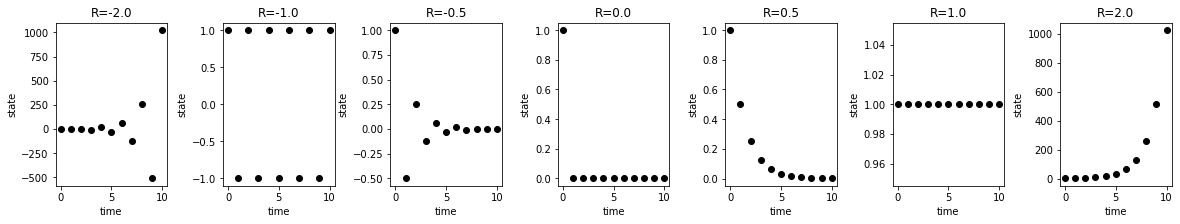

In [74]:
# simulate the various R values
R_values = [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0]
results = []
for R in R_values:
    results.append(
        map_simulate(x0 = np.array([1.0]), f_rules=f_linear_factory(R=R))
    )

# plot results
f, axes = plt.subplots(nrows=1, ncols=len(R_values), figsize=(20, 3))
f.subplots_adjust(wspace=0.5)
for k, R in enumerate(R_values):
    ax = axes[k]
    df = results[k]
    ax.plot(df.time, df.S0, 'o', color="black")
    ax.set_title(f"R={R}")
    ax.set_ylabel("state")
    ax.set_xlabel("time")

plt.show()
f.savefig("./images/linear_map.png", bbox_inches="tight", dpi=150)

## logistic map

In [75]:
def f_logistic_factory(R=1.0):
    
    def f_logistic(x, R=R):
        """ Linear map. """
        return R * x * (1-x)
        
    return f_logistic

In [76]:
df1 = map_simulate(x0 = np.array([0.5]), f_rules=f_logistic_factory(R=1.5))

'x0 = [0.5]'
           S0  time
x0   0.500000     0
x1   0.375000     1
x2   0.351562     2
x3   0.341949     3
x4   0.337530     4
x5   0.335405     5
x6   0.334363     6
x7   0.333847     7
x8   0.333590     8
x9   0.333461     9
x10  0.333397    10
----------------------------------------


In [77]:
# start in steady state
df1 = map_simulate(x0 = np.array([1.0/3.0]), f_rules=f_logistic_factory(R=1.5))

'x0 = [0.33333333]'
           S0  time
x0   0.333333     0
x1   0.333333     1
x2   0.333333     2
x3   0.333333     3
x4   0.333333     4
x5   0.333333     5
x6   0.333333     6
x7   0.333333     7
x8   0.333333     8
x9   0.333333     9
x10  0.333333    10
----------------------------------------


'x0 = [0.9]'
           S0  time
x0   0.900000     0
x1   0.135000     1
x2   0.175162     2
x3   0.216721     3
x4   0.254629     4
x5   0.284690     5
x6   0.305462     6
x7   0.318233     7
x8   0.325441     8
x9   0.329294     9
x10  0.331289    10
----------------------------------------


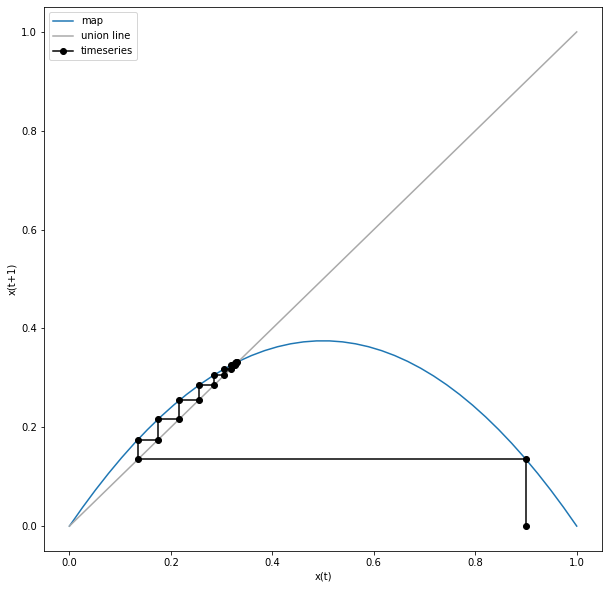

In [101]:
def web_plot(x0, f_rules):
    """Web plot for given map."""

    xvec = np.linspace(0, 1, num=40)
    df = map_simulate(x0, f_rules)
    
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    ax.plot(xvec, f_rules(xvec), label="map")   # plot map
    ax.plot(xvec, xvec, color="darkgrey", label="union line")  # union line    
    
    # get time series values
    x_series = df.S0.values

    x_web = []
    y_web = []
    for k in range(len(x_series)):
        if k==0:
            x_web.append(x_series[0])
            y_web.append(0)
        else:
            x_web.append(x_series[k-1])
            y_web.append(x_series[k])

            x_web.append(x_series[k])
            y_web.append(x_series[k])

    ax.plot(x_web, y_web, 'o-', color="black", label="timeseries")
    ax.legend()
    ax.set_xlabel("x(t)")
    ax.set_ylabel("x(t+1)")
    
    return f


f = web_plot(x0=np.array([0.9]), f_rules=f_logistic_factory(R=1.5))
plt.show()